In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

In [2]:
jokes = pd.read_excel('clean_jokes.xlsx')
users = pd.read_excel('users.xlsx')

In [3]:
jokes

,Unnamed: 0,ID,Joke,Keyword,BERT rating,Funny rating,Offensive rating,Surprise rating,Reality rep rating,Username
0,0,1,You know you're a Monash Malaysia student when...,Monash,0.373286,1,1,1,0,yennileong
1,1,2,"Uncle Roger tells you, Monash students are lik...",Monash,0.254151,3,1,3,1,yennileong
2,2,3,"Aiyoh, Monash students spend more time searchi...",Monash,-0.133187,4,1,4,1,yennileong
3,3,4,"In Malaysia, we have a 'two-in-one' parenting ...",parenting,-0.094748,3,1,3,1,yennileong
4,4,5,You know you're a Malaysian parent when you've...,parenting,-0.218633,2,1,2,1,yennileong
...,...,...,...,...,...,...,...,...,...,...
635,670,671,You know you're in a Malaysian school when you...,education,-0.004247,1,1,1,0,benleong
636,671,672,Malaysian schools are the only place where 're...,education,-0.695507,1,1,1,0,benleong
637,672,673,Why did the Monash Confession page get a Miche...,Monash confession,-0.058005,2,1,1,0,benleong
638,673,674,"Aiya, Monash Confession page, it's like a bowl...",Monash confession,-0.433682,1,1,1,0,benleong


In [4]:
users

,Username,Password,Age,Gender,Continent,Favourite Comedian,Personality
0,yennileong,yennileong,21,female,asia,shinchan,logician
1,Lee Shuhaida,123456,21,female,asia,Jimmy O. Young,executive
2,ccxy,ccxy,23,female,asia,NaN,architect
3,jensen,1234,20,male,asia,NaN,adventurer
4,elouise,123,23,female,asia,NaN,defender
5,Carissa,123,22,female,asia,NaN,mediator
6,pei ling,123,18,female,asia,NaN,adventurer
7,Michella,1234567,20,female,asia,NaN,executive
8,jayd0n,jscsSQUIDBOY666!,17,male,asia,NaN,debater
9,mohanrj,dinesh123,26,male,asia,NaN,virtuoso


In [5]:
df = pd.merge(jokes, users, on='Username', how='left')
df

,Unnamed: 0,ID,Joke,Keyword,BERT rating,Funny rating,Offensive rating,Surprise rating,Reality rep rating,Username,Password,Age,Gender,Continent,Favourite Comedian,Personality
0,0,1,You know you're a Monash Malaysia student when...,Monash,0.373286,1,1,1,0,yennileong,yennileong,21,female,asia,shinchan,logician
1,1,2,"Uncle Roger tells you, Monash students are lik...",Monash,0.254151,3,1,3,1,yennileong,yennileong,21,female,asia,shinchan,logician
2,2,3,"Aiyoh, Monash students spend more time searchi...",Monash,-0.133187,4,1,4,1,yennileong,yennileong,21,female,asia,shinchan,logician
3,3,4,"In Malaysia, we have a 'two-in-one' parenting ...",parenting,-0.094748,3,1,3,1,yennileong,yennileong,21,female,asia,shinchan,logician
4,4,5,You know you're a Malaysian parent when you've...,parenting,-0.218633,2,1,2,1,yennileong,yennileong,21,female,asia,shinchan,logician
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,670,671,You know you're in a Malaysian school when you...,education,-0.004247,1,1,1,0,benleong,hello,22,male,asia,NaN,defender
636,671,672,Malaysian schools are the only place where 're...,education,-0.695507,1,1,1,0,benleong,hello,22,male,asia,NaN,defender
637,672,673,Why did the Monash Confession page get a Miche...,Monash confession,-0.058005,2,1,1,0,benleong,hello,22,male,asia,NaN,defender
638,673,674,"Aiya, Monash Confession page, it's like a bowl...",Monash confession,-0.433682,1,1,1,0,benleong,hello,22,male,asia,NaN,defender


In [6]:
df.Personality.unique()

array(['logician', 'executive', 'architect', 'adventurer', 'defender',
       'mediator', 'virtuoso', 'debater', 'protagonist', 'commander',
       'entrepreneur', 'campaigner', 'advocate'], dtype=object)

In [7]:
def categorize_personality(val):
    if val in ['architect', 'logician', 'commander', 'debater']:
        return 'Analysts'
    elif val in ['advocate', 'mediator', 'protagonist', 'campaigner']:
        return 'Diplomats'
    elif val in ['logistician', 'defender', 'executive', 'consul']:
        return 'Sentinels'
    else:
        return 'Explorers'
    
df['main_personality'] = df['Personality'].apply(categorize_personality)
df

,Unnamed: 0,ID,Joke,Keyword,BERT rating,Funny rating,Offensive rating,Surprise rating,Reality rep rating,Username,Password,Age,Gender,Continent,Favourite Comedian,Personality,main_personality
0,0,1,You know you're a Monash Malaysia student when...,Monash,0.373286,1,1,1,0,yennileong,yennileong,21,female,asia,shinchan,logician,Analysts
1,1,2,"Uncle Roger tells you, Monash students are lik...",Monash,0.254151,3,1,3,1,yennileong,yennileong,21,female,asia,shinchan,logician,Analysts
2,2,3,"Aiyoh, Monash students spend more time searchi...",Monash,-0.133187,4,1,4,1,yennileong,yennileong,21,female,asia,shinchan,logician,Analysts
3,3,4,"In Malaysia, we have a 'two-in-one' parenting ...",parenting,-0.094748,3,1,3,1,yennileong,yennileong,21,female,asia,shinchan,logician,Analysts
4,4,5,You know you're a Malaysian parent when you've...,parenting,-0.218633,2,1,2,1,yennileong,yennileong,21,female,asia,shinchan,logician,Analysts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,670,671,You know you're in a Malaysian school when you...,education,-0.004247,1,1,1,0,benleong,hello,22,male,asia,NaN,defender,Sentinels
636,671,672,Malaysian schools are the only place where 're...,education,-0.695507,1,1,1,0,benleong,hello,22,male,asia,NaN,defender,Sentinels
637,672,673,Why did the Monash Confession page get a Miche...,Monash confession,-0.058005,2,1,1,0,benleong,hello,22,male,asia,NaN,defender,Sentinels
638,673,674,"Aiya, Monash Confession page, it's like a bowl...",Monash confession,-0.433682,1,1,1,0,benleong,hello,22,male,asia,NaN,defender,Sentinels


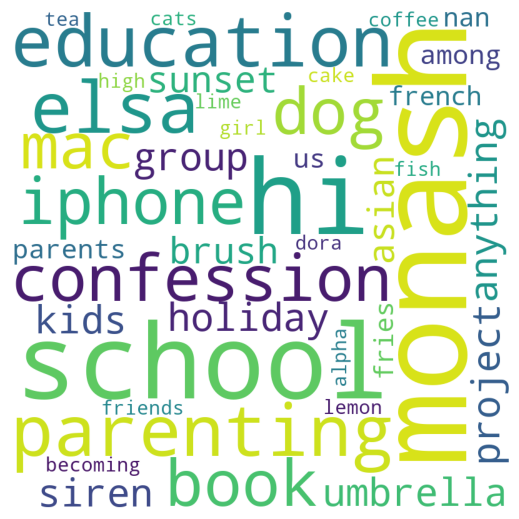

In [8]:
comment_words = ''
stopwords = set(STOPWORDS)
fig, ax = plt.subplots()
 
# iterate through the csv file
for val in jokes.Keyword.unique():
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
fig.savefig('keyword_frequencies.png') 
plt.show()

In [9]:
merged_df = df[['main_personality', 'Funny rating']]
merged_df

,main_personality,Funny rating
0,Analysts,1
1,Analysts,3
2,Analysts,4
3,Analysts,3
4,Analysts,2
...,...,...
635,Sentinels,1
636,Sentinels,1
637,Sentinels,2
638,Sentinels,1


In [10]:
heatmap_data = merged_df.pivot_table(index='main_personality', columns='Funny rating', aggfunc=len, fill_value=0)
heatmap_data

Funny rating,1,2,3,4,5
main_personality,,,,,
Analysts,51,39,32,36,22
Diplomats,31,33,37,36,23
Explorers,37,29,40,39,15
Sentinels,41,29,23,22,25


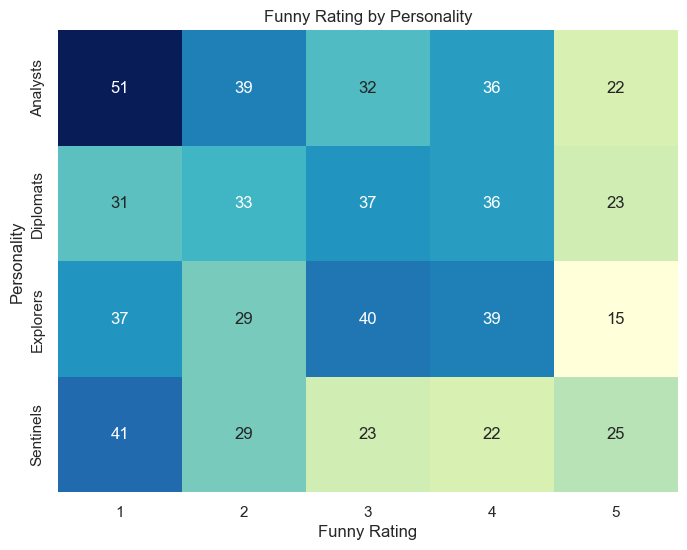

In [11]:
merged_df = df[['main_personality', 'Funny rating']]
heatmap_data = merged_df.pivot_table(index='main_personality', columns='Funny rating', aggfunc=len, fill_value=0)

sns.set(style="whitegrid")  # Optional: Set a style for the heatmap
plt.figure(figsize=(8, 6))  # Optional: Set the figure size

sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', cbar=False)

plt.title('Funny Rating by Personality')
plt.xlabel('Funny Rating')
plt.ylabel('Personality')

plt.show()

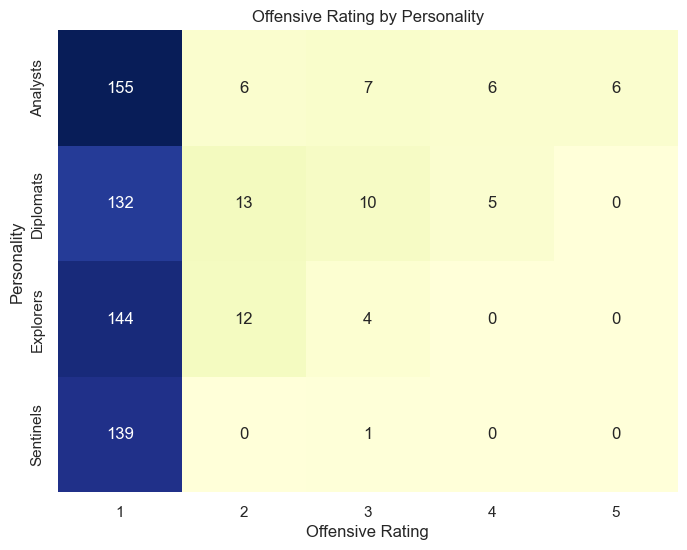

In [12]:
merged_df = df[['main_personality', 'Offensive rating']]
heatmap_data = merged_df.pivot_table(index='main_personality', columns='Offensive rating', aggfunc=len, fill_value=0)

sns.set(style="whitegrid")  # Optional: Set a style for the heatmap
plt.figure(figsize=(8, 6))  # Optional: Set the figure size

sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', cbar=False)

plt.title('Offensive Rating by Personality')
plt.xlabel('Offensive Rating')
plt.ylabel('Personality')

plt.show()

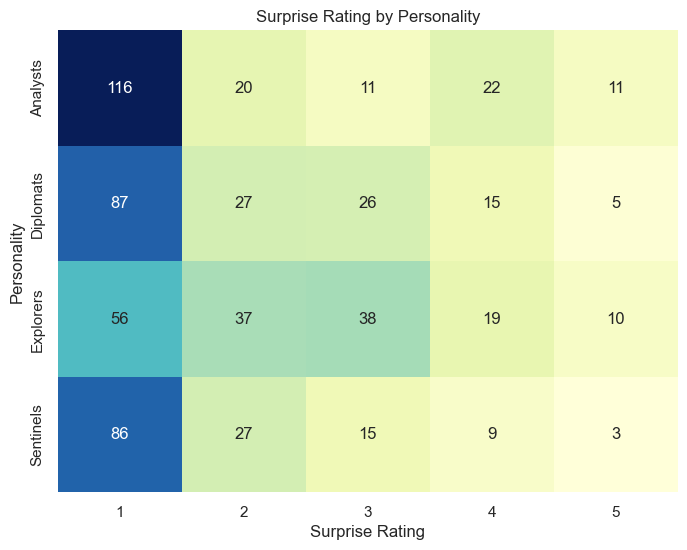

In [13]:
merged_df = df[['main_personality', 'Surprise rating']]
heatmap_data = merged_df.pivot_table(index='main_personality', columns='Surprise rating', aggfunc=len, fill_value=0)

sns.set(style="whitegrid")  # Optional: Set a style for the heatmap
plt.figure(figsize=(8, 6))  # Optional: Set the figure size

sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', cbar=False)

plt.title('Surprise Rating by Personality')
plt.xlabel('Surprise Rating')
plt.ylabel('Personality')

plt.show()

C:\Users\RachelToh\AppData\Local\Temp\ipykernel_8216\1180647960.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="main_personality", y="Funny rating", data=df, ci=None, label="Funny Rating", color="skyblue", ax=ax)
C:\Users\RachelToh\AppData\Local\Temp\ipykernel_8216\1180647960.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="main_personality", y="Offensive rating", data=df, ci=None, label="Offensive Rating", color="salmon", ax=ax)
C:\Users\RachelToh\AppData\Local\Temp\ipykernel_8216\1180647960.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="main_personality", y="Surprise rating", data=df, ci=None, label="Surprise Rating", color="lightgreen", ax=ax)


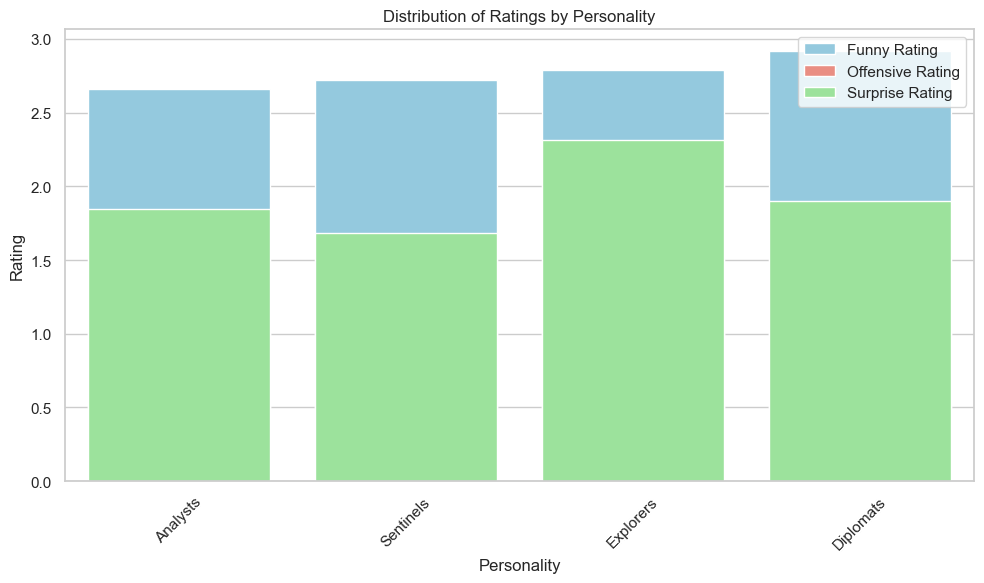

In [14]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Grouped bar plot for ratings
sns.barplot(x="main_personality", y="Funny rating", data=df, ci=None, label="Funny Rating", color="skyblue", ax=ax)
sns.barplot(x="main_personality", y="Offensive rating", data=df, ci=None, label="Offensive Rating", color="salmon", ax=ax)
sns.barplot(x="main_personality", y="Surprise rating", data=df, ci=None, label="Surprise Rating", color="lightgreen", ax=ax)

# Overlay box plots to show the distribution within each personality category
# sns.boxplot(x="main_personality", y="Funny rating", data=df, width=0.2, showfliers=False, color="blue", ax=ax)
# sns.boxplot(x="main_personality", y="Offensive rating", data=df, width=0.2, showfliers=False, color="red", ax=ax)
# sns.boxplot(x="main_personality", y="Surprise rating", data=df, width=0.2, showfliers=False, color="green", ax=ax)

# Customize the plot
ax.set_xlabel("Personality")
ax.set_ylabel("Rating")
ax.set_title("Distribution of Ratings by Personality")
ax.legend(loc="upper right", frameon=True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [15]:
df['rounded_bert_rating'] = round(df['BERT rating'],1)
df

,Unnamed: 0,ID,Joke,Keyword,BERT rating,Funny rating,Offensive rating,Surprise rating,Reality rep rating,Username,Password,Age,Gender,Continent,Favourite Comedian,Personality,main_personality,rounded_bert_rating
0,0,1,You know you're a Monash Malaysia student when...,Monash,0.373286,1,1,1,0,yennileong,yennileong,21,female,asia,shinchan,logician,Analysts,0.4
1,1,2,"Uncle Roger tells you, Monash students are lik...",Monash,0.254151,3,1,3,1,yennileong,yennileong,21,female,asia,shinchan,logician,Analysts,0.3
2,2,3,"Aiyoh, Monash students spend more time searchi...",Monash,-0.133187,4,1,4,1,yennileong,yennileong,21,female,asia,shinchan,logician,Analysts,-0.1
3,3,4,"In Malaysia, we have a 'two-in-one' parenting ...",parenting,-0.094748,3,1,3,1,yennileong,yennileong,21,female,asia,shinchan,logician,Analysts,-0.1
4,4,5,You know you're a Malaysian parent when you've...,parenting,-0.218633,2,1,2,1,yennileong,yennileong,21,female,asia,shinchan,logician,Analysts,-0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,670,671,You know you're in a Malaysian school when you...,education,-0.004247,1,1,1,0,benleong,hello,22,male,asia,NaN,defender,Sentinels,-0.0
636,671,672,Malaysian schools are the only place where 're...,education,-0.695507,1,1,1,0,benleong,hello,22,male,asia,NaN,defender,Sentinels,-0.7
637,672,673,Why did the Monash Confession page get a Miche...,Monash confession,-0.058005,2,1,1,0,benleong,hello,22,male,asia,NaN,defender,Sentinels,-0.1
638,673,674,"Aiya, Monash Confession page, it's like a bowl...",Monash confession,-0.433682,1,1,1,0,benleong,hello,22,male,asia,NaN,defender,Sentinels,-0.4


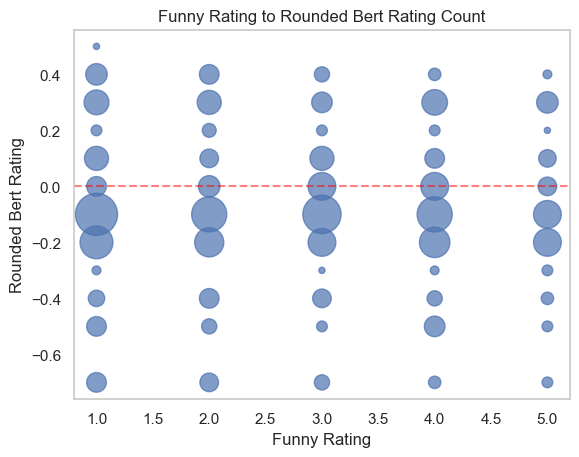

In [16]:
counts = df.groupby(['Funny rating', 'rounded_bert_rating']).size().reset_index(name='count')

plt.scatter(counts['Funny rating'],counts['rounded_bert_rating'] , s=counts['count'] * 20, alpha=0.7)

plt.grid(False)

plt.axhline(0, color='red', linestyle='--', label='y = 0', alpha=0.5)

# Set axis labels
plt.xlabel('Funny Rating')
plt.ylabel('Rounded Bert Rating')

# Set a title
plt.title('Funny Rating to Rounded Bert Rating Count')

plt.show()

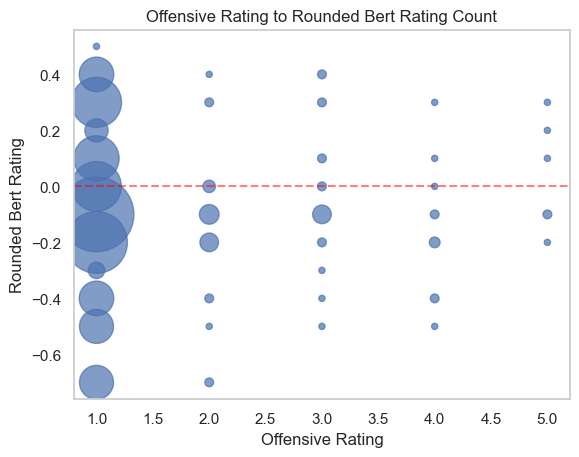

In [17]:
counts = df.groupby(['Offensive rating', 'rounded_bert_rating']).size().reset_index(name='count')

plt.scatter(counts['Offensive rating'],counts['rounded_bert_rating'] , s=counts['count'] * 20, alpha=0.7)

plt.grid(False)

plt.axhline(0, color='red', linestyle='--', label='y = 0', alpha=0.5)

# Set axis labels
plt.xlabel('Offensive Rating')
plt.ylabel('Rounded Bert Rating')

# Set a title
plt.title('Offensive Rating to Rounded Bert Rating Count')

plt.show()

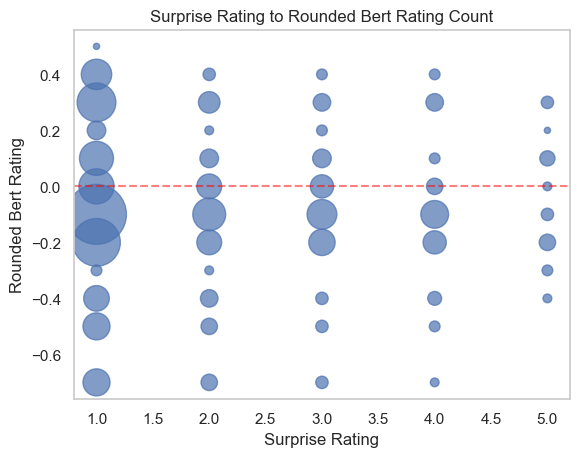

In [18]:
counts = df.groupby(['Surprise rating', 'rounded_bert_rating']).size().reset_index(name='count')

plt.scatter(counts['Surprise rating'],counts['rounded_bert_rating'] , s=counts['count'] * 20, alpha=0.7)

plt.grid(False)

plt.axhline(0, color='red', linestyle='--', label='y = 0', alpha=0.5)

# Set axis labels
plt.xlabel('Surprise Rating')
plt.ylabel('Rounded Bert Rating')

# Set a title
plt.title('Surprise Rating to Rounded Bert Rating Count')

plt.show()

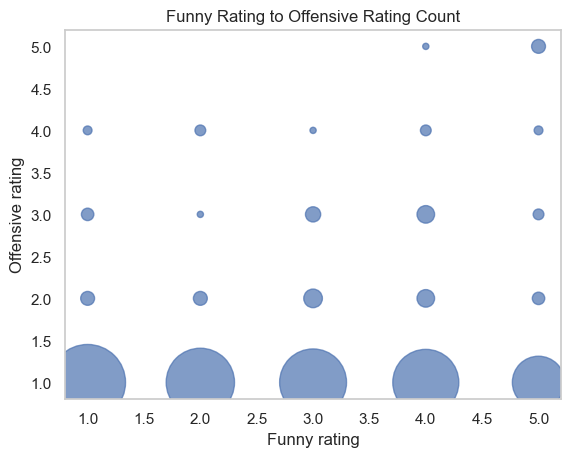

In [19]:
counts = df.groupby(['Offensive rating', 'Funny rating']).size().reset_index(name='count')

plt.scatter(counts['Funny rating'],counts['Offensive rating'] , s=counts['count'] * 20, alpha=0.7)

plt.grid(False)

# Set axis labels
plt.xlabel('Funny rating')
plt.ylabel('Offensive rating')

# Set a title
plt.title('Funny Rating to Offensive Rating Count')

plt.show()

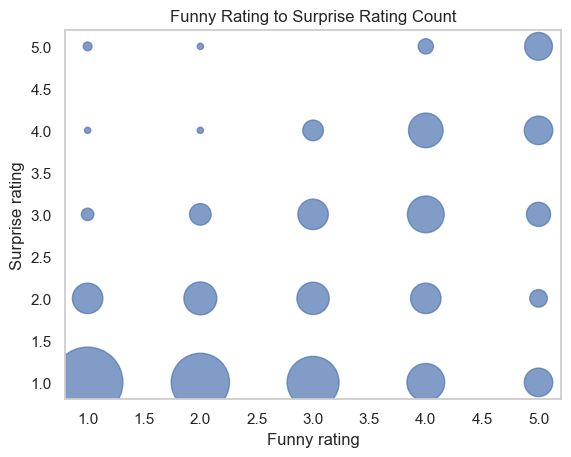

In [20]:
counts = df.groupby(['Surprise rating', 'Funny rating']).size().reset_index(name='count')

plt.scatter(counts['Funny rating'],counts['Surprise rating'] , s=counts['count'] * 20, alpha=0.7)

plt.grid(False)

# Set axis labels
plt.xlabel('Funny rating')
plt.ylabel('Surprise rating')

# Set a title
plt.title('Funny Rating to Surprise Rating Count')

plt.show()

C:\Users\RachelToh\AppData\Local\Temp\ipykernel_8216\3381580144.py:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(scalar_map, label='Count')


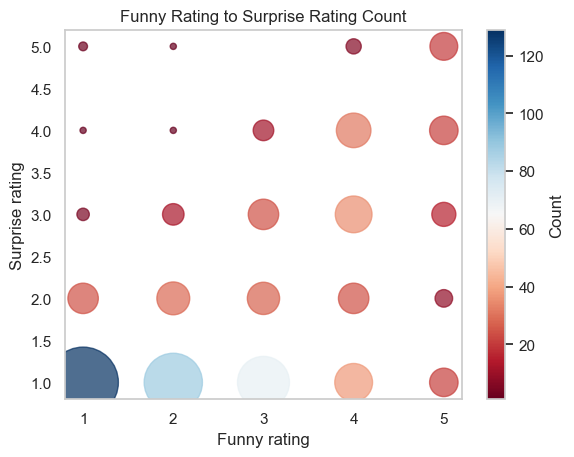

In [21]:
counts = df.groupby(['Surprise rating', 'Funny rating']).size().reset_index(name='count')

# plt.scatter(counts['Funny rating'],counts['Surprise rating'] , s=counts['count'] * 20, alpha=0.7)

# Define a colormap (e.g., 'viridis')
cmap = plt.get_cmap('RdBu')

# Normalize the data for colormap mapping
normalize = plt.Normalize(vmin=counts['count'].min(), vmax=counts['count'].max())

# Create a ScalarMappable to map data values to colors
scalar_map = plt.cm.ScalarMappable(cmap=cmap, norm=normalize)

# Scatter plot with gradient colors
scatter = plt.scatter(counts['Funny rating'], counts['Surprise rating'], s=counts['count'] * 20, alpha=0.7, c=counts['count'], cmap=cmap)

# Add a colorbar
plt.colorbar(scalar_map, label='Count')

plt.grid(False)

# Set axis labels
plt.xlabel('Funny rating')
plt.ylabel('Surprise rating')

# Set a title
plt.title('Funny Rating to Surprise Rating Count')

plt.show()


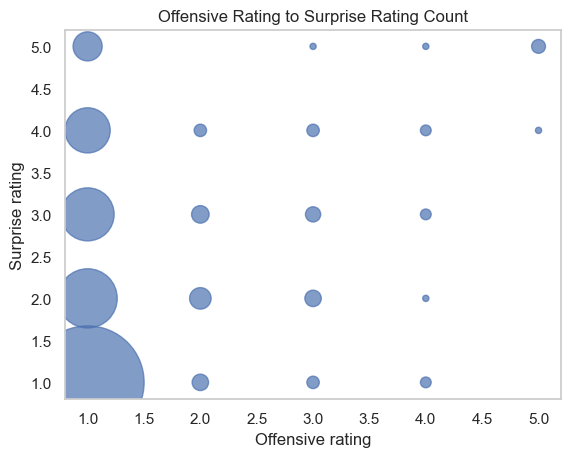

In [22]:
counts = df.groupby(['Surprise rating', 'Offensive rating']).size().reset_index(name='count')

plt.scatter(counts['Offensive rating'],counts['Surprise rating'] , s=counts['count'] * 20, alpha=0.7)

plt.grid(False)

# Set axis labels
plt.xlabel('Offensive rating')
plt.ylabel('Surprise rating')

# Set a title
plt.title('Offensive Rating to Surprise Rating Count')

plt.show()

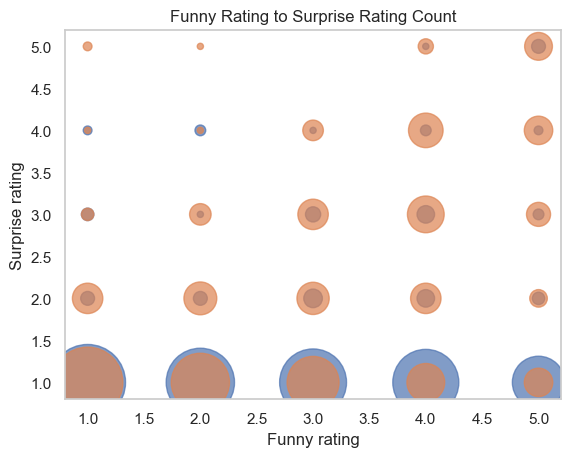

In [23]:
counts1 = df.groupby(['Offensive rating', 'Funny rating']).size().reset_index(name='count')
counts2 = df.groupby(['Surprise rating', 'Funny rating']).size().reset_index(name='count')

plt.scatter(counts1['Funny rating'],counts1['Offensive rating'] , s=counts1['count'] * 20, alpha=0.7)
plt.scatter(counts2['Funny rating'],counts2['Surprise rating'] , s=counts2['count'] * 20, alpha=0.7)

plt.grid(False)

# Set axis labels
plt.xlabel('Funny rating')
plt.ylabel('Surprise rating')

# Set a title
plt.title('Funny Rating to Surprise Rating Count')

plt.show()

In [24]:
counts_funny = df['Funny rating']
counts_offensive = df['Offensive rating']
counts_surprise = df['Surprise rating']

print('funny & offensive')
print(np.corrcoef(counts_funny, counts_offensive))
print('funny & surprise')
print(np.corrcoef(counts_funny, counts_surprise))
print('offensive & surprise')
print(np.corrcoef(counts_offensive, counts_surprise))

funny & offensive
[[1.        0.1448833]
 [0.1448833 1.       ]]
funny & surprise
[[1.         0.52729496]
 [0.52729496 1.        ]]
offensive & surprise
[[1.         0.26356084]
 [0.26356084 1.        ]]


In [25]:
df_ratings = df[['BERT rating', 'Funny rating', 'Offensive rating', 'Surprise rating', 'Reality rep rating']]
corr = df_ratings.corr('pearson')
corr

,BERT rating,Funny rating,Offensive rating,Surprise rating,Reality rep rating
BERT rating,1.000000,-0.008182,-0.005334,-0.011256,-0.030343
Funny rating,-0.008182,1.000000,0.144883,0.527295,0.321934
Offensive rating,-0.005334,0.144883,1.000000,0.263561,0.098681
Surprise rating,-0.011256,0.527295,0.263561,1.000000,0.185826
Reality rep rating,-0.030343,0.321934,0.098681,0.185826,1.000000


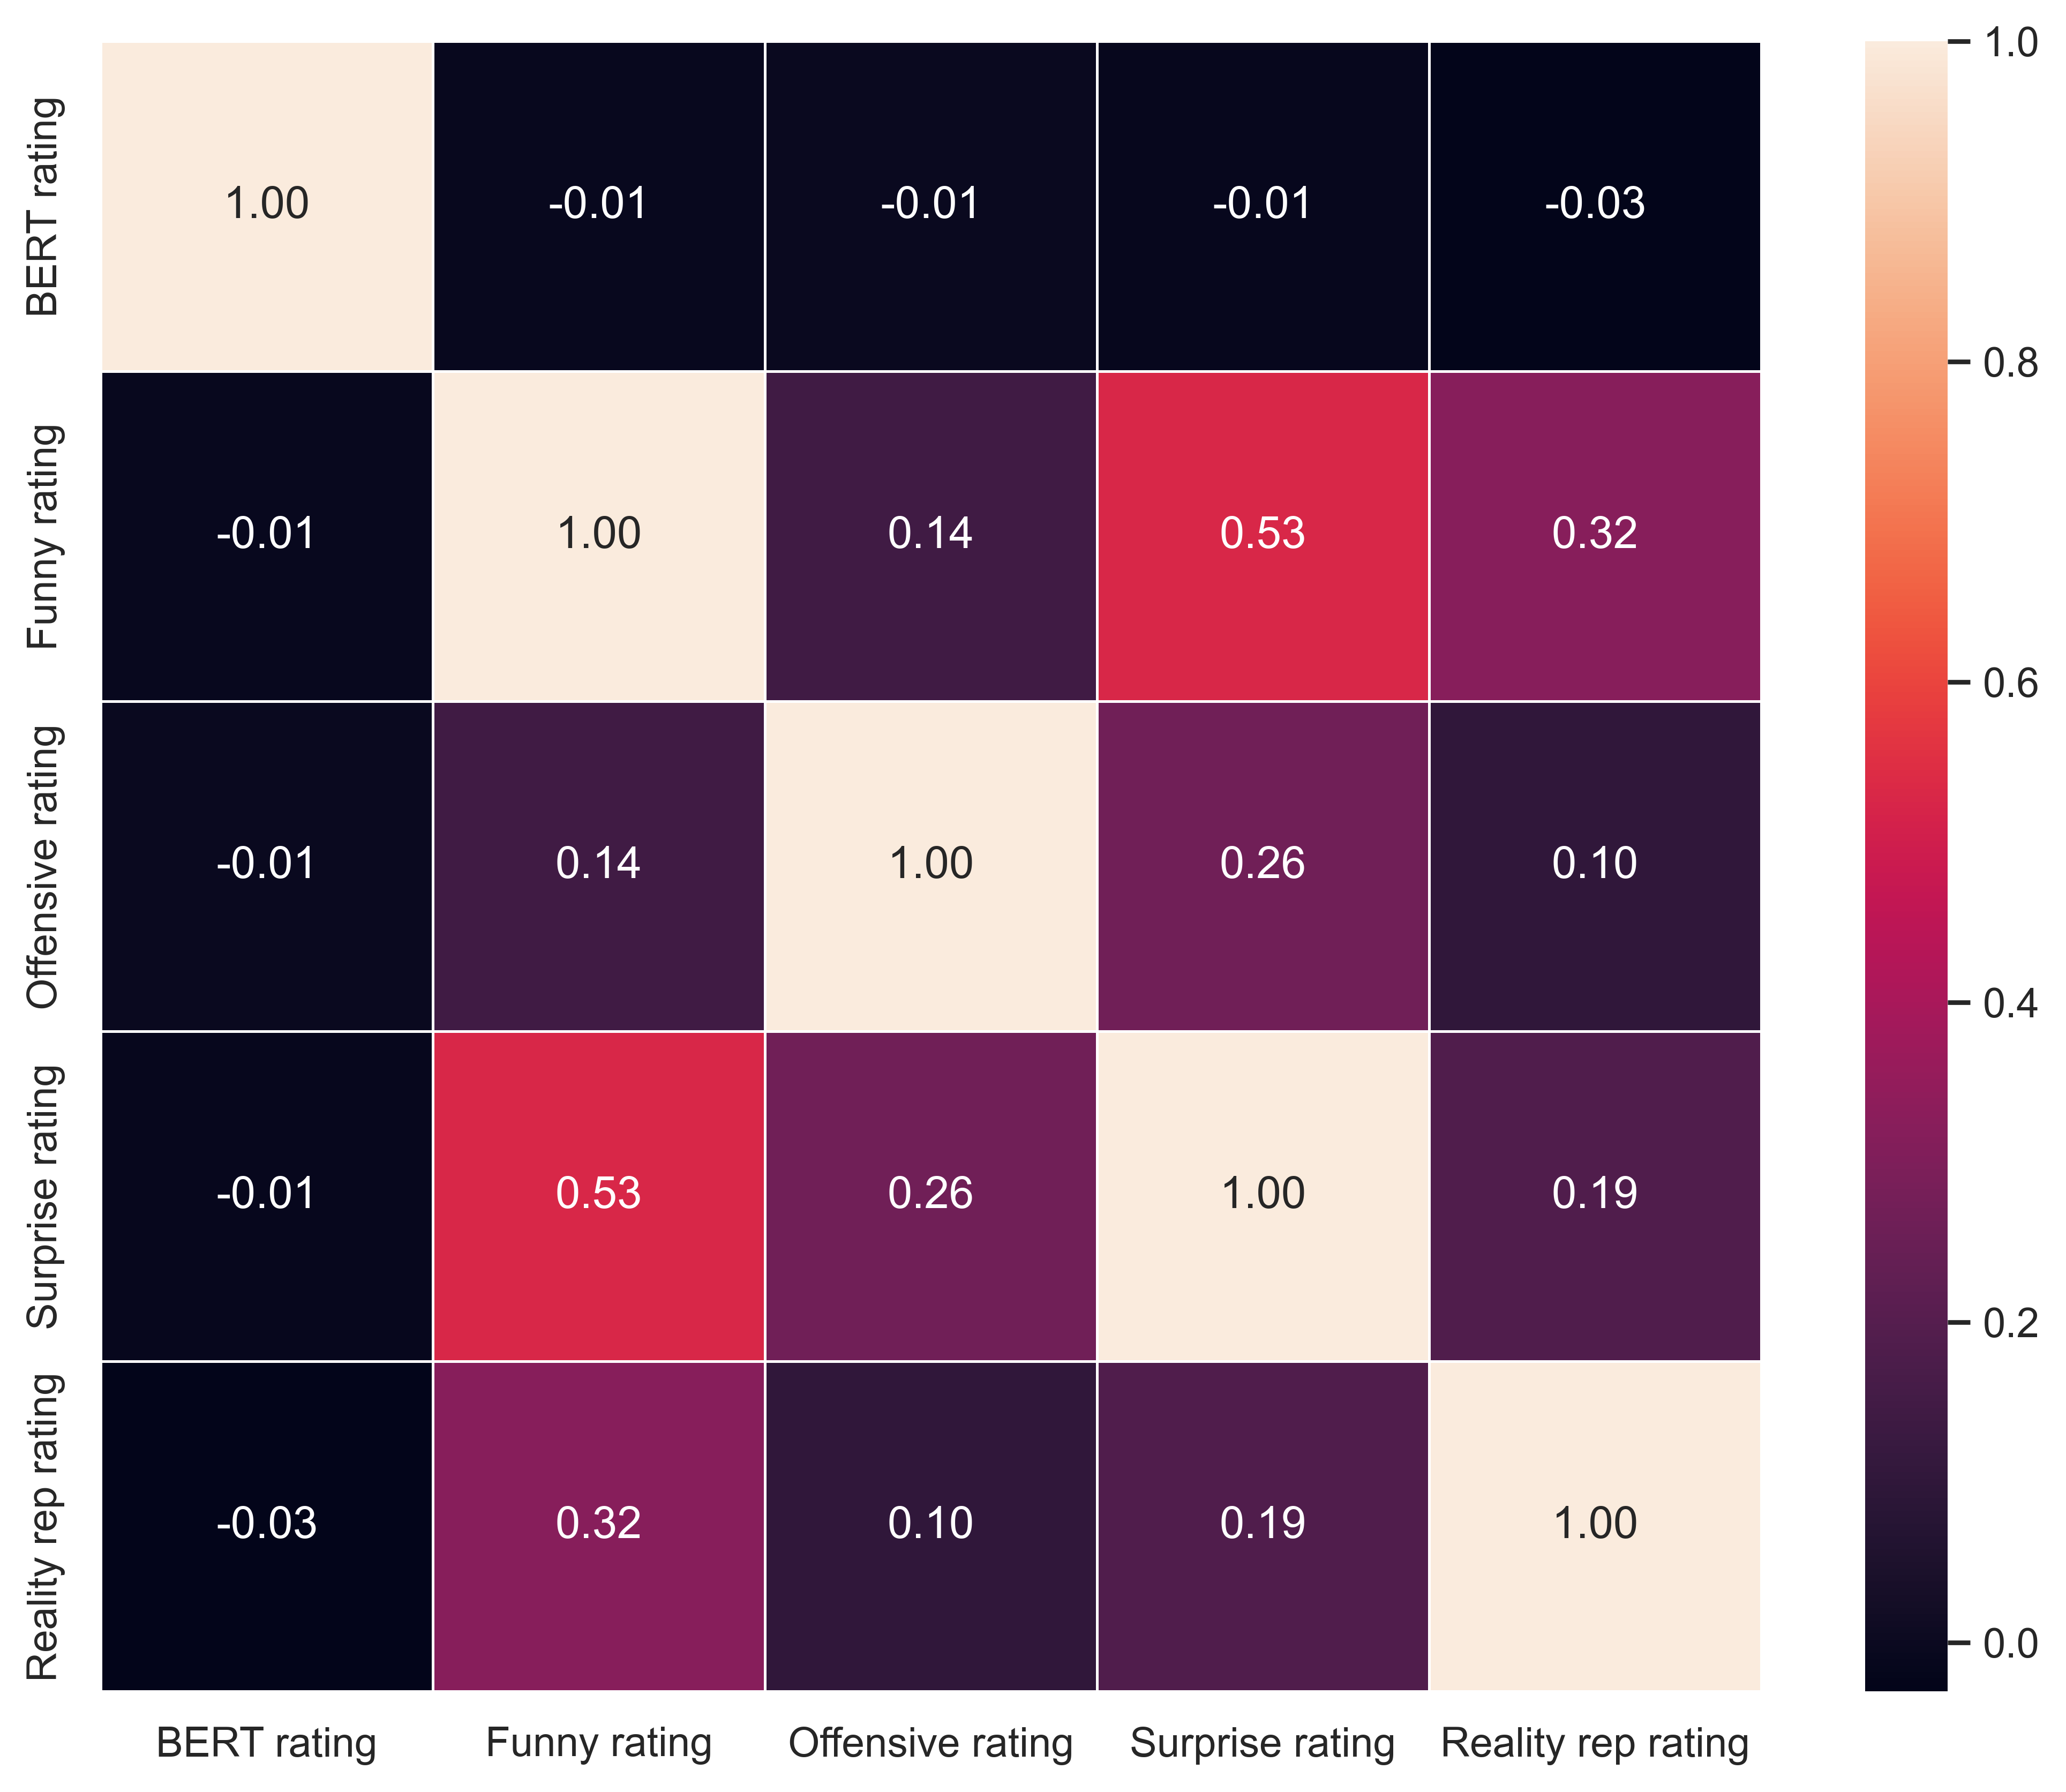

In [26]:
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

This graph shows the correlation of different ratings we have, such as BERT rating, Funny, Offensive, Surprise and Reality Representation rating

One highlight in this graph is, Funny rating tends to have high correlation with Surprise rating, which means often when people find the jokes funny, they also feel surprise by them. 

Another thing observed is the BERT rating has very low correlation to other ratings, which means that our model rating does not really match the user feedback

In [27]:
counts = df.loc[df['main_personality'] == 'Analysts'].groupby('Funny rating')['main_personality'].count().reset_index(name='count_funny')
funny_rating = counts['Funny rating']
analysts_count_funny = counts['count_funny']

counts = df.loc[df['main_personality'] == 'Diplomats'].groupby('Funny rating')['main_personality'].count().reset_index(name='count_funny')
diplomats_count_funny = counts['count_funny']

counts = df.loc[df['main_personality'] == 'Explorers'].groupby('Funny rating')['main_personality'].count().reset_index(name='count_funny')
explorers_count_funny = counts['count_funny']

counts = df.loc[df['main_personality'] == 'Sentinels'].groupby('Funny rating')['main_personality'].count().reset_index(name='count_funny')
sentinels_count_funny = counts['count_funny']

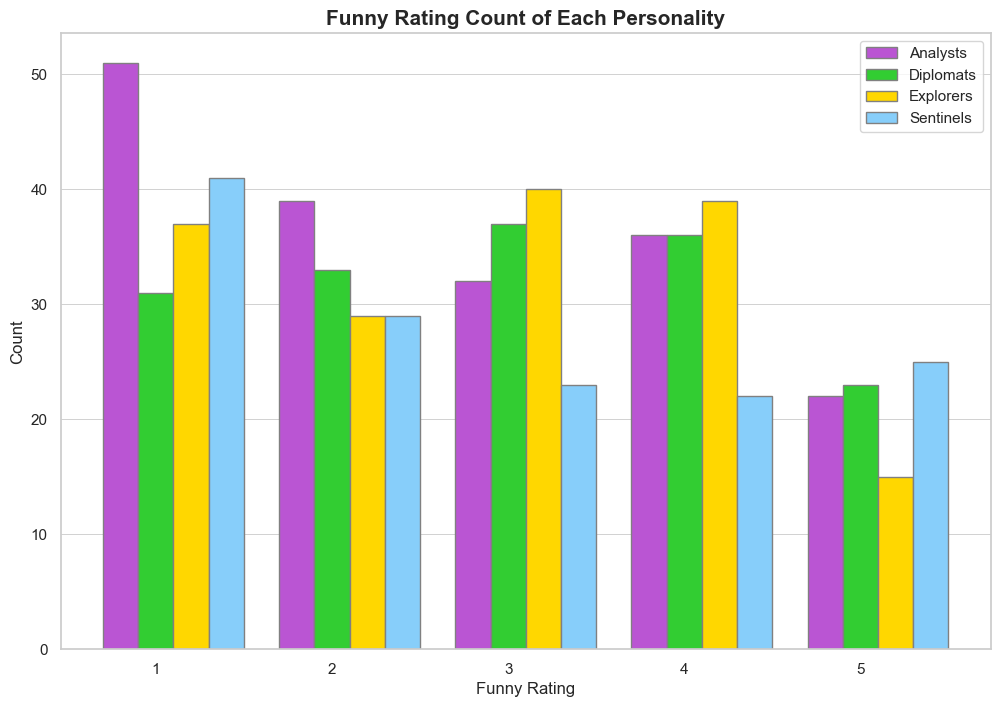

In [62]:
# set width of bar 
barWidth = 0.2
fig = plt.subplots(figsize =(12, 8)) 
 
# Set position of bar on X axis 
br1 = np.arange(len(analysts_count_funny)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
br4 = [x + barWidth for x in br3] 
 
# Make the plot
plt.bar(br1, analysts_count_funny, color ='mediumorchid', width = barWidth, 
        edgecolor ='grey', label ='Analysts') 
plt.bar(br2, diplomats_count_funny, color ='limegreen', width = barWidth, 
        edgecolor ='grey', label ='Diplomats') 
plt.bar(br3, explorers_count_funny, color ='gold', width = barWidth, 
        edgecolor ='grey', label ='Explorers') 
plt.bar(br4, sentinels_count_funny, color ='lightskyblue', width = barWidth, 
        edgecolor ='grey', label ='Sentinels') 
 
# Adding Xticks 
plt.xlabel('Funny Rating') 
plt.ylabel('Count') 
plt.xticks([r + barWidth for r in range(len(analysts_count_funny))], 
        ['1', '2', '3', '4', '5'])
plt.title('Funny Rating Count of Each Personality', fontweight ='bold', fontsize = 15)
 
plt.legend()
plt.grid(False)
plt.grid(True, color = "grey", linewidth = 0.5,  axis = 'y', alpha=0.5)
plt.show() 

from this graph, it shows funny rating given by each personality

Sentinels ppl gave the most 5 star rating to jokes, while explorers gave the least

on the other hand, Analysts rated most 1 star among other personalities, while Diplomats gave the least 1 star

And we can see the distribution is right skewed, but surprisingly people also give out a lot of 4 stars rating, which means they found out some jokes are funny, even though bert model gave low ratings

In [29]:
counts = df.loc[df['main_personality'] == 'Analysts'].groupby('Offensive rating')['main_personality'].count().reset_index(name='count_offensive')
analysts_count_offensive = counts['count_offensive']
print(counts)

counts = df.loc[df['main_personality'] == 'Diplomats'].groupby('Offensive rating')['main_personality'].count().reset_index(name='count_offensive')
diplomats_count_offensive = counts['count_offensive']
print(counts)

counts = df.loc[df['main_personality'] == 'Explorers'].groupby('Offensive rating')['main_personality'].count().reset_index(name='count_offensive')
explorers_count_offensive = counts['count_offensive']
print(counts)

counts = df.loc[df['main_personality'] == 'Sentinels'].groupby('Offensive rating')['main_personality'].count().reset_index(name='count_offensive')
sentinels_count_offensive = counts['count_offensive']
print(counts)

   Offensive rating  count_offensive
0                 1              155
1                 2                6
2                 3                7
3                 4                6
4                 5                6
   Offensive rating  count_offensive
0                 1              132
1                 2               13
2                 3               10
3                 4                5
   Offensive rating  count_offensive
0                 1              144
1                 2               12
2                 3                4
   Offensive rating  count_offensive
0                 1              139
1                 3                1


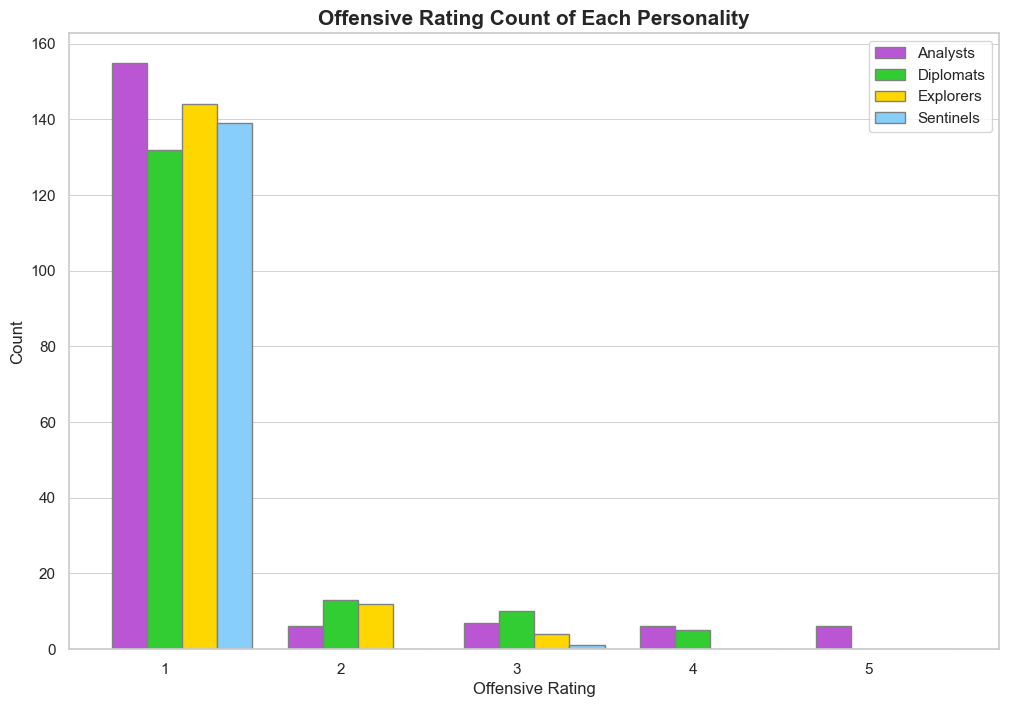

In [63]:
diplomats_count_offensive = [132,13,10,5,0]
explorers_count_offensive = [144,12,4,0,0]
sentinels_count_offensive = [139,0,1,0,0]

# set width of bar 
barWidth = 0.2
fig = plt.subplots(figsize =(12, 8)) 
 
# Set position of bar on X axis 
br1 = np.arange(len(analysts_count_offensive)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
br4 = [x + barWidth for x in br3] 
 
# Make the plot
plt.bar(br1, analysts_count_offensive, color ='mediumorchid', width = barWidth, 
        edgecolor ='grey', label ='Analysts') 
plt.bar(br2, diplomats_count_offensive, color ='limegreen', width = barWidth, 
        edgecolor ='grey', label ='Diplomats') 
plt.bar(br3, explorers_count_offensive, color ='gold', width = barWidth, 
        edgecolor ='grey', label ='Explorers') 
plt.bar(br4, sentinels_count_offensive, color ='lightskyblue', width = barWidth, 
        edgecolor ='grey', label ='Sentinels') 
 
# Adding Xticks 
plt.xlabel('Offensive Rating') 
plt.ylabel('Count') 
plt.xticks([r + barWidth for r in range(len(analysts_count_funny))], 
        ['1', '2', '3', '4', '5'])
plt.title('Offensive Rating Count of Each Personality', fontweight ='bold', fontsize = 15)
 
plt.legend()
plt.grid(False)
plt.grid(True, color = "grey", linewidth = 0.5,  axis = 'y', alpha=0.5)
plt.show() 

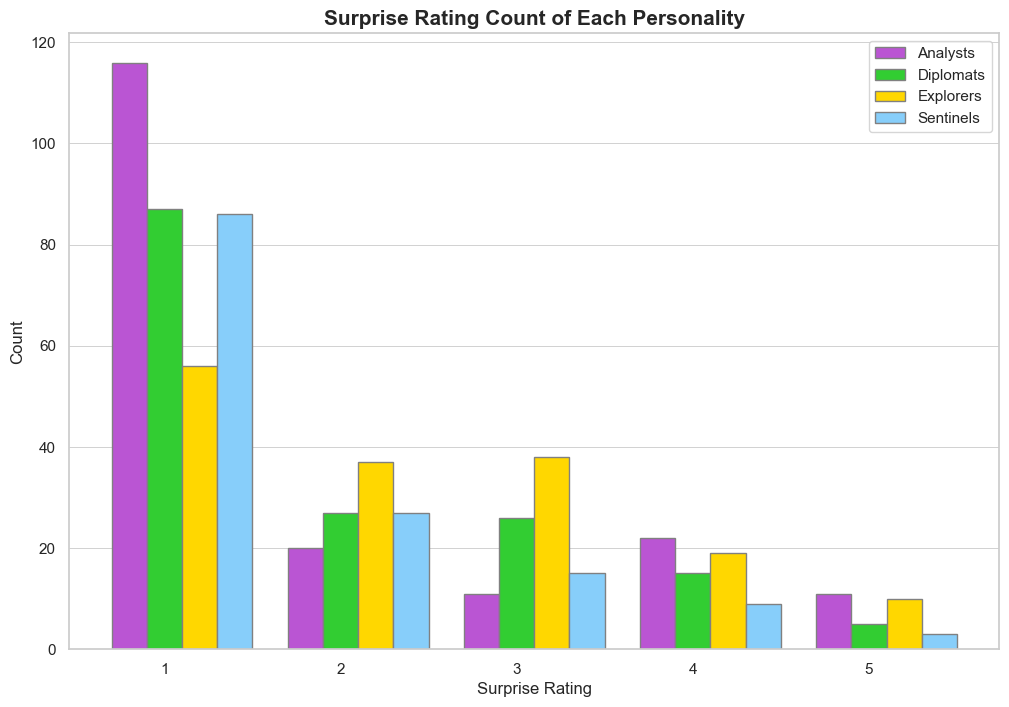

In [113]:
counts = df.loc[df['main_personality'] == 'Analysts'].groupby('Surprise rating')['main_personality'].count().reset_index(name='count_surprise')
analysts_count_surprise = counts['count_surprise']

counts = df.loc[df['main_personality'] == 'Diplomats'].groupby('Surprise rating')['main_personality'].count().reset_index(name='count_surprise')
diplomats_count_surprise = counts['count_surprise']

counts = df.loc[df['main_personality'] == 'Explorers'].groupby('Surprise rating')['main_personality'].count().reset_index(name='count_surprise')
explorers_count_surprise = counts['count_surprise']

counts = df.loc[df['main_personality'] == 'Sentinels'].groupby('Surprise rating')['main_personality'].count().reset_index(name='count_surprise')
sentinels_count_surprise = counts['count_surprise']

# set width of bar 
barWidth = 0.2
fig = plt.subplots(figsize =(12, 8)) 
 
# Set position of bar on X axis 
br1 = np.arange(len(analysts_count_surprise)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
br4 = [x + barWidth for x in br3] 
 
# Make the plot
plt.bar(br1, analysts_count_surprise, color ='mediumorchid', width = barWidth, 
        edgecolor ='grey', label ='Analysts') 
plt.bar(br2, diplomats_count_surprise, color ='limegreen', width = barWidth, 
        edgecolor ='grey', label ='Diplomats') 
plt.bar(br3, explorers_count_surprise, color ='gold', width = barWidth, 
        edgecolor ='grey', label ='Explorers') 
plt.bar(br4, sentinels_count_surprise, color ='lightskyblue', width = barWidth, 
        edgecolor ='grey', label ='Sentinels') 
 
# Adding Xticks 
plt.xlabel('Surprise Rating') 
plt.ylabel('Count') 
plt.xticks([r + barWidth for r in range(len(analysts_count_funny))], 
        ['1', '2', '3', '4', '5'])
plt.title('Surprise Rating Count of Each Personality', fontweight ='bold', fontsize = 15)
 
plt.legend()
plt.grid(False)
plt.grid(True, color = "grey", linewidth = 0.5,  axis = 'y', alpha=0.5)
plt.show() 

This graph shows surprise rating given by each personality.

From this graph we can see that most of the people rated 1 star. 

However, Explorers rated 2 or more stars more times than other personalities. This could be match their personality description which they tend to notice the good sides of things more often

In [32]:
df_high_offensive = df.loc[df['Offensive rating'] > 3]
df_high_offensive = df_high_offensive[['Joke', 'Keyword', 'BERT rating', 'Funny rating', 'Offensive rating', 'Surprise rating', 'Reality rep rating', 'Personality', 'Username']]
df_high_offensive

,Joke,Keyword,BERT rating,Funny rating,Offensive rating,Surprise rating,Reality rep rating,Personality,Username
46,"Uncle Roger tells you, Monash students are lik...",Monash,0.254151,5,4,1,1,architect,ccxy
47,"Aiyoh, Monash students spend more time searchi...",Monash,-0.133187,5,4,2,1,architect,ccxy
281,"Uncle Roger tells you, Monash students are lik...",Monash,0.254151,5,5,5,1,debater,jayd0n
282,"Aiyoh, Monash students spend more time searchi...",Monash,-0.133187,4,5,4,1,debater,jayd0n
284,You know you're a Malaysian parent when you've...,parenting,-0.218633,3,4,4,1,debater,jayd0n
285,"In Malaysia, bedtime is a suggestion, not a ru...",parenting,-0.224419,5,5,5,1,debater,jayd0n
293,"Aiya, Monash Confession page, it's like a bowl...",Monash confession,-0.433682,4,4,4,1,debater,jayd0n
295,What did the crewmate say to the Impostor when...,Among us,0.182063,5,5,5,1,debater,jayd0n
296,Why do crewmates always complete tasks before ...,Among us,0.069919,5,5,5,1,debater,jayd0n
297,How do Impostors stay in shape in Among Us? Th...,Among us,0.050647,4,4,4,1,debater,jayd0n


In [33]:
high_offensive_jokes = df_high_offensive.Joke.values
for i in range(len(high_offensive_jokes)):
    print(i+1)
    print(high_offensive_jokes[i])

1
Uncle Roger tells you, Monash students are like fried rice – they mix and match courses until they create their own unique major, like 'Economics with a side of Film Studies!'
2
Aiyoh, Monash students spend more time searching for parking spots than they do studying. If they collected parking tickets, they'd have a degree in fines!
3
Uncle Roger tells you, Monash students are like fried rice – they mix and match courses until they create their own unique major, like 'Economics with a side of Film Studies!'
4
Aiyoh, Monash students spend more time searching for parking spots than they do studying. If they collected parking tickets, they'd have a degree in fines!
5
You know you're a Malaysian parent when you've perfected the 'silent threat' look that can stop your child's misbehavior in its tracks. It's our version of the Death Stare!
6
In Malaysia, bedtime is a suggestion, not a rule. 'Sleep early' means 'stay up until 2 AM watching YouTube', and 'brush your teeth' is optional!
7
Aiya

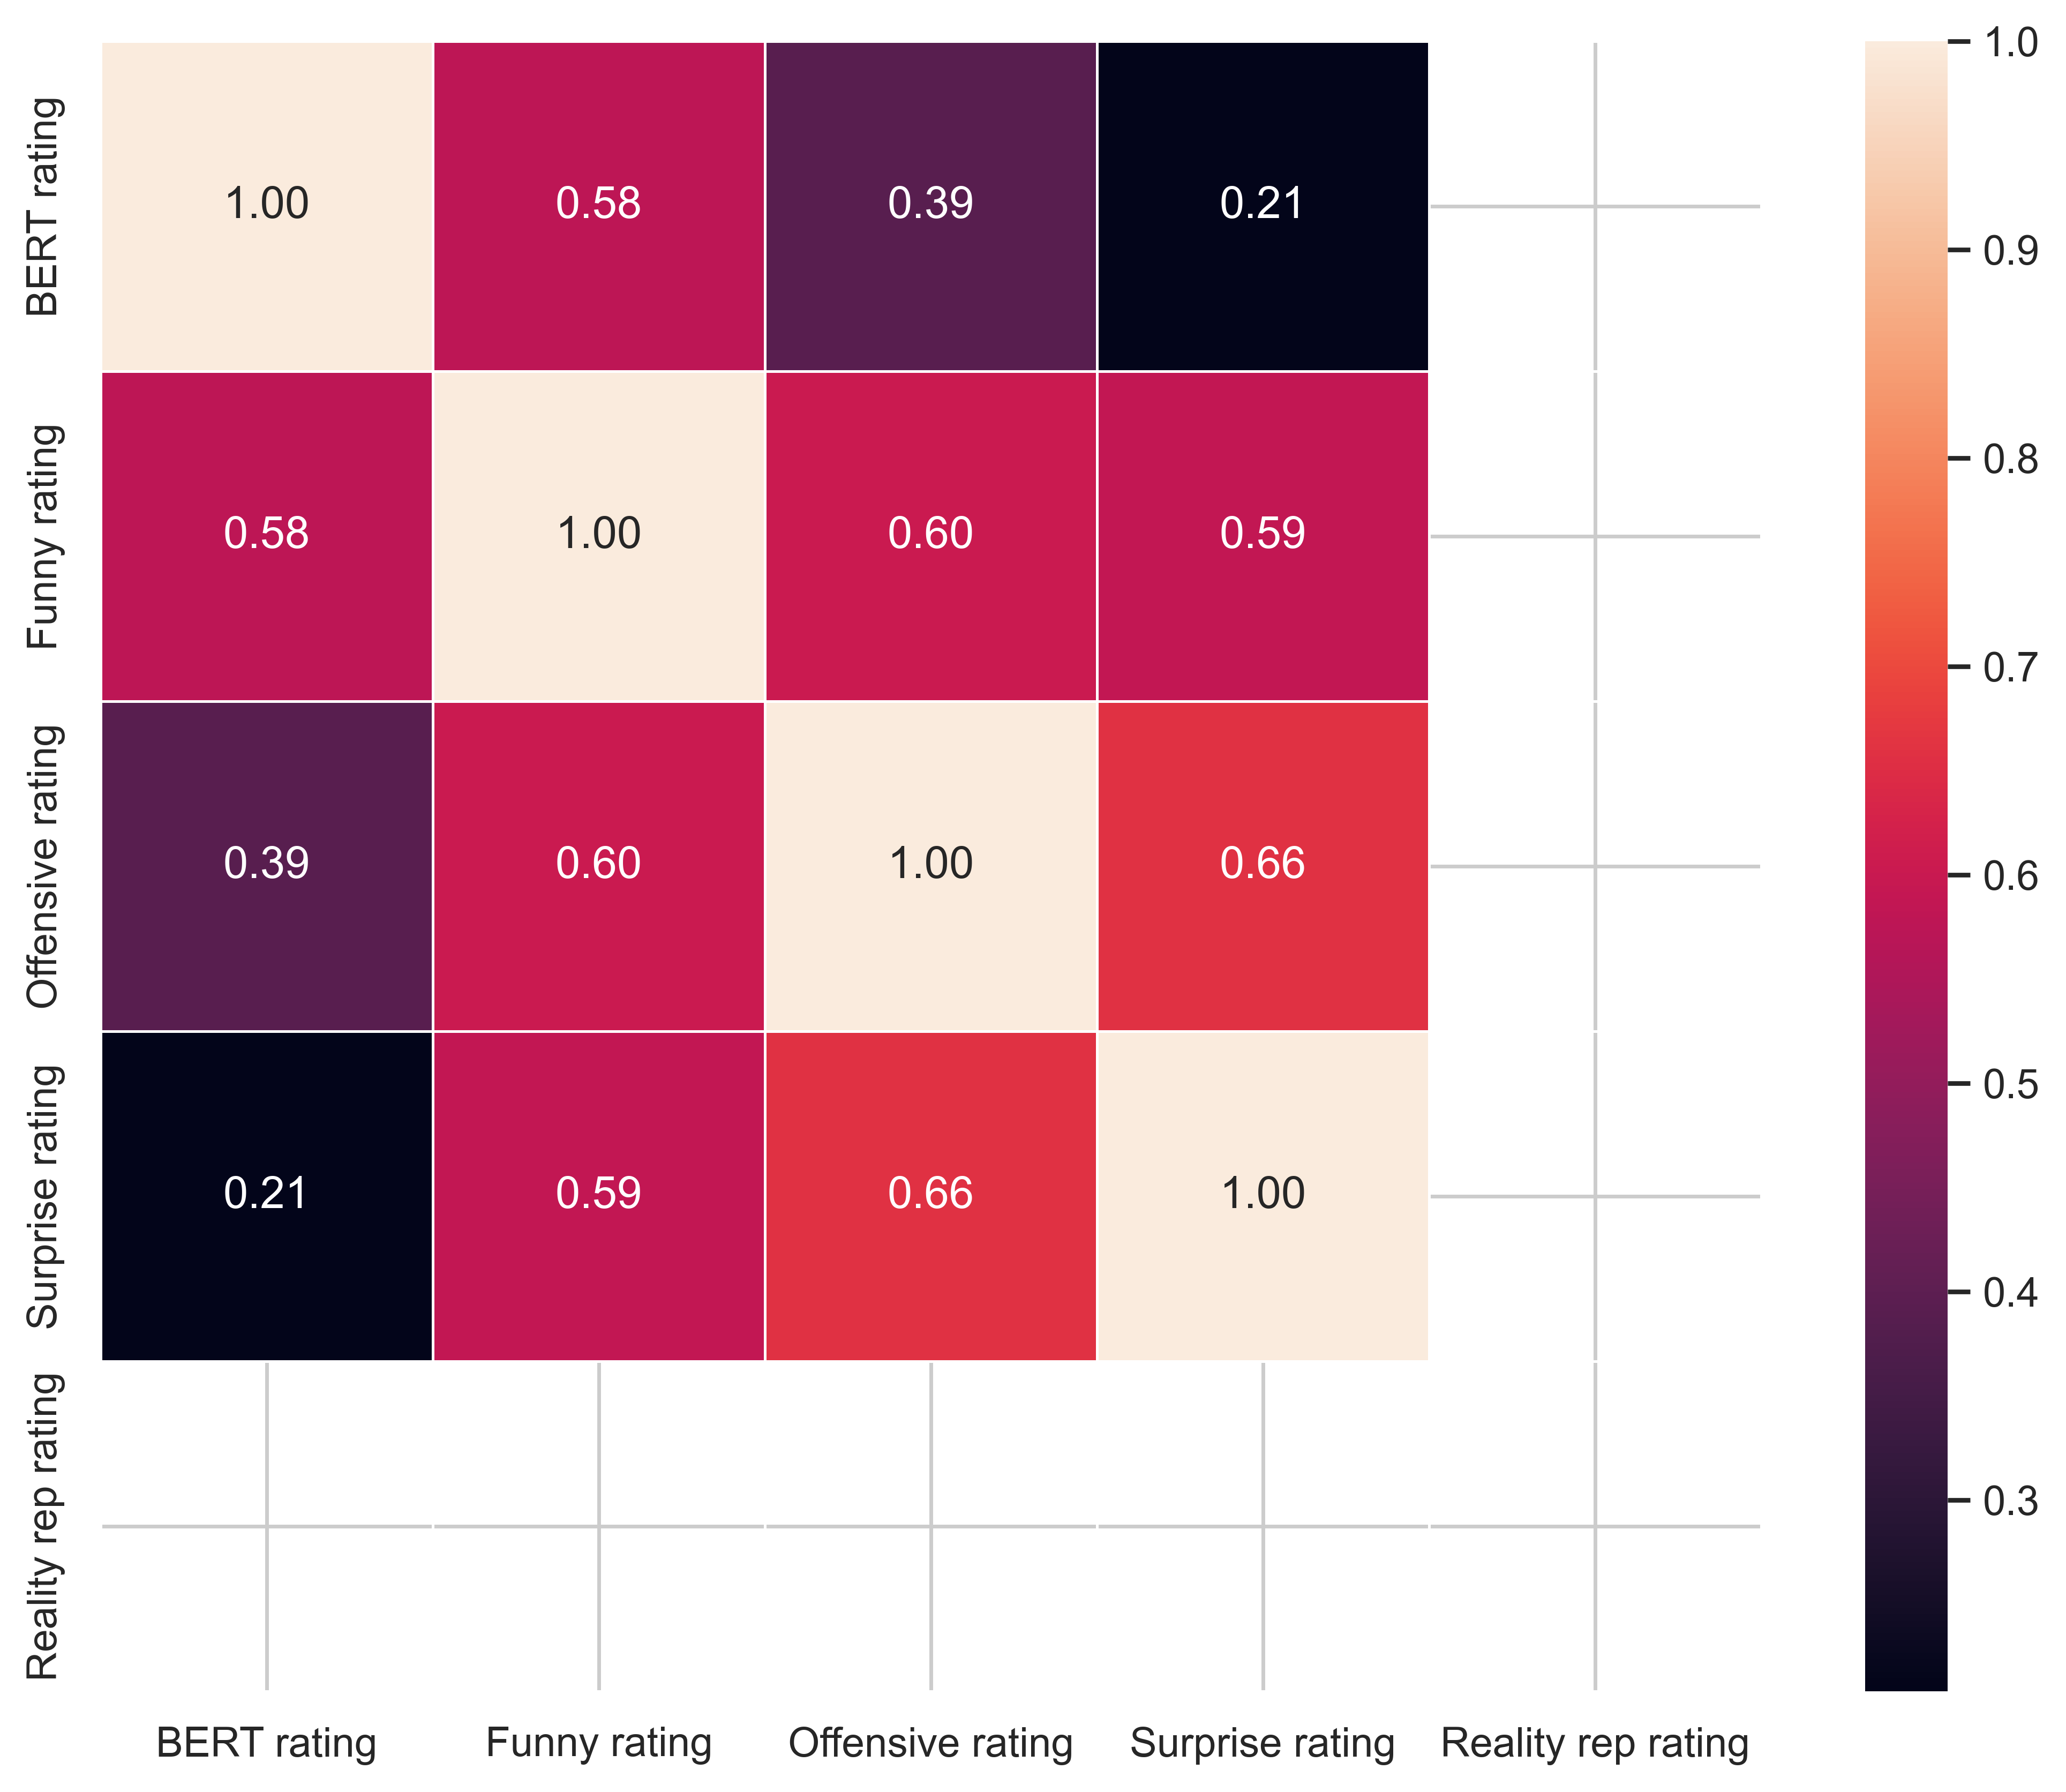

In [34]:
df_high_offensive_rating = df_high_offensive[['BERT rating', 'Funny rating', 'Offensive rating', 'Surprise rating', 'Reality rep rating']]

corr_offensive = df_high_offensive_rating.corr('pearson')

plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr_offensive,annot=True,fmt=".2f", linewidth=.5)
plt.show()

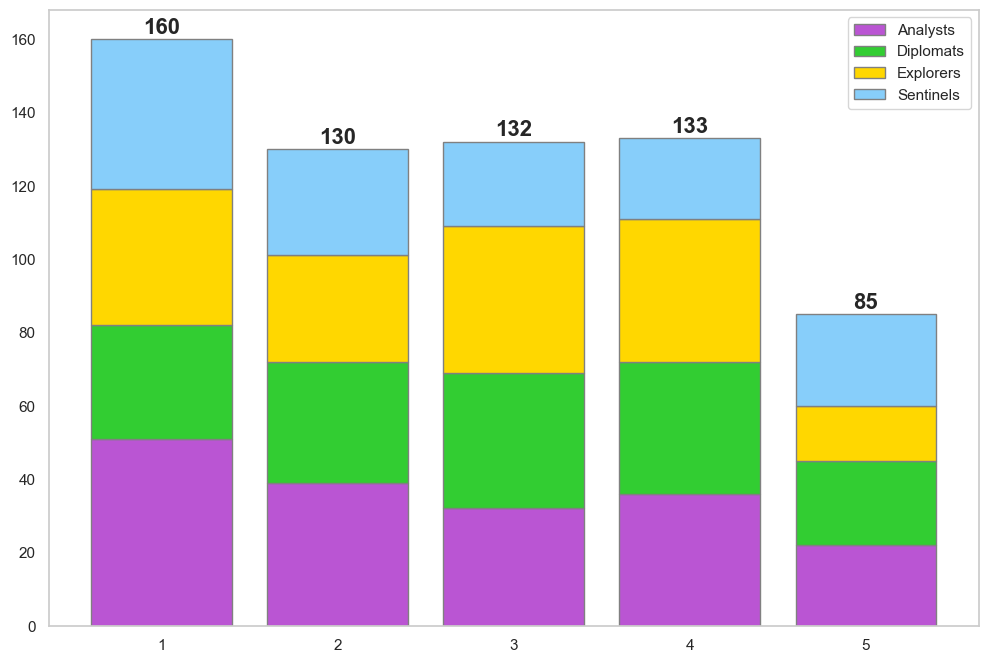

In [108]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i], y[i] + 1.5, y[i], ha = 'center', weight='bold', fontsize=16)

# set width of bar 
barWidth = 0.2
fig, ax = plt.subplots(figsize =(12, 8)) 
 
# Set position of bar on X axis 
br1 = np.arange(len(analysts_count_funny)) + 1
 
# Make the plot
plt.bar(br1, analysts_count_funny, color='mediumorchid', label='Analysts', edgecolor ='grey')
plt.bar(br1, diplomats_count_funny, bottom=analysts_count_funny,
        color='limegreen', label='Diplomats', edgecolor ='grey')
plt.bar(br1, explorers_count_funny, bottom=analysts_count_funny+diplomats_count_funny,
        color='gold', label='Explorers', edgecolor ='grey')
plt.bar(br1, sentinels_count_funny, bottom=analysts_count_funny+diplomats_count_funny+explorers_count_funny,
        color='lightskyblue', label='Sentinels', edgecolor ='grey')

# Sum up the rows of our data to get the total value of each bar.
totals = []
for i in range(5):
    total = analysts_count_funny[i] + diplomats_count_funny[i] + explorers_count_funny[i] + sentinels_count_funny[i]
    totals.append(total)
    
addlabels(br1, totals)

plt.legend()
plt.grid(False)
plt.show() 

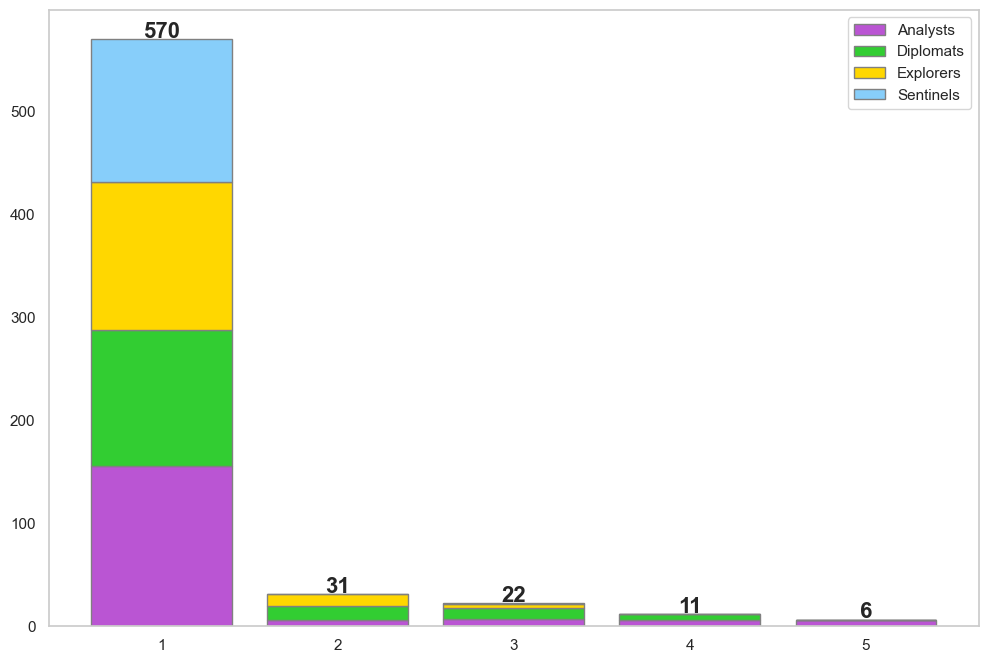

In [110]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i], y[i] + 1.5, y[i], ha = 'center', weight='bold', fontsize=16)

# set width of bar 
barWidth = 0.2
fig, ax = plt.subplots(figsize =(12, 8)) 
 
# Set position of bar on X axis 
br1 = np.arange(len(analysts_count_offensive)) + 1
 
# Make the plot
plt.bar(br1, analysts_count_offensive, color='mediumorchid', label='Analysts', edgecolor ='grey')
plt.bar(br1, diplomats_count_offensive, bottom=analysts_count_offensive,
        color='limegreen', label='Diplomats', edgecolor ='grey')
plt.bar(br1, explorers_count_surprise, bottom=analysts_count_offensive+diplomats_count_offensive,
        color='gold', label='Explorers', edgecolor ='grey')
plt.bar(br1, sentinels_count_offensive, bottom=analysts_count_offensive+diplomats_count_offensive+explorers_count_offensive,
        color='lightskyblue', label='Sentinels', edgecolor ='grey')

# Sum up the rows of our data to get the total value of each bar.
totals = []
for i in range(5):
    total = analysts_count_offensive[i] + diplomats_count_offensive[i] + explorers_count_offensive[i] + sentinels_count_offensive[i]
    totals.append(total)
    
addlabels(br1, totals)

plt.legend()
plt.grid(False)
plt.show() 

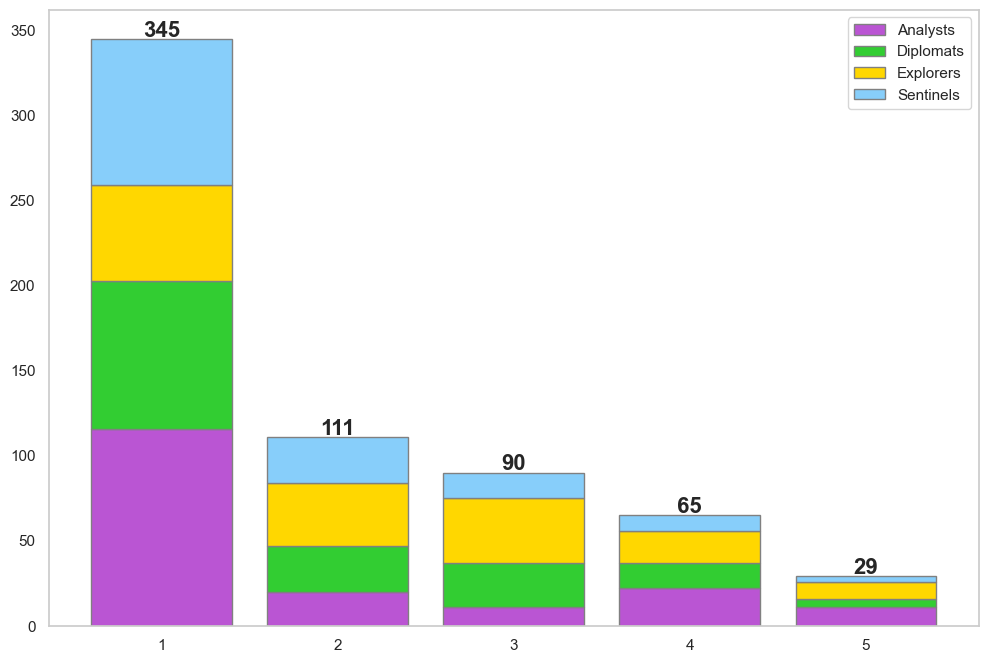

In [114]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i], y[i] + 1.5, y[i], ha = 'center', weight='bold', fontsize=16)

# set width of bar 
barWidth = 0.2
fig, ax = plt.subplots(figsize =(12, 8)) 
 
# Set position of bar on X axis 
br1 = np.arange(len(analysts_count_surprise)) + 1
 
# Make the plot
plt.bar(br1, analysts_count_surprise, color='mediumorchid', label='Analysts', edgecolor ='grey')
plt.bar(br1, diplomats_count_surprise, bottom=analysts_count_surprise,
        color='limegreen', label='Diplomats', edgecolor ='grey')
plt.bar(br1, explorers_count_surprise, bottom=analysts_count_surprise+diplomats_count_surprise,
        color='gold', label='Explorers', edgecolor ='grey')
plt.bar(br1, sentinels_count_surprise, bottom=analysts_count_surprise+diplomats_count_surprise+explorers_count_surprise,
        color='lightskyblue', label='Sentinels', edgecolor ='grey')

# Sum up the rows of our data to get the total value of each bar.
totals = []
for i in range(5):
    total = analysts_count_surprise[i] + diplomats_count_surprise[i] + explorers_count_surprise[i] + sentinels_count_surprise[i]
    totals.append(total)
    
addlabels(br1, totals)

plt.legend()
plt.grid(False)
plt.show() 